In [ ]:
!pip3 install autokeras==1.0.16post1

     |████████████████████████████████| 166 kB 4.3 MB/s 
     |████████████████████████████████| 97 kB 4.8 MB/s 
     |████████████████████████████████| 460.3 MB 8.5 kB/s 
     |████████████████████████████████| 14.8 MB 47.2 MB/s 
     |████████████████████████████████| 4.0 MB 43.3 MB/s 
     |████████████████████████████████| 462 kB 55.5 MB/s 
     |████████████████████████████████| 132 kB 58.2 MB/s 
     |████████████████████████████████| 1.2 MB 40.3 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68719 sha256=63b4bca4e6a47c9159a57b2be9987db243162db65fa4b970d5da16dd8614cace
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: numpy
    Found 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import autokeras as ak

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

labels = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

4423680/4422102 [==============================] - 0s 0us/step


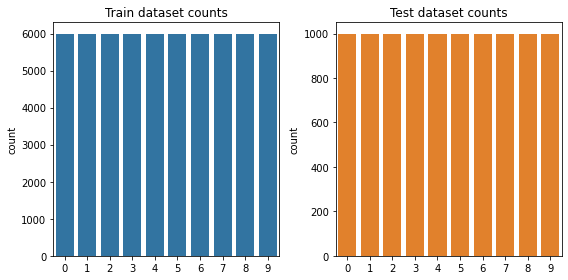

In [ ]:
fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(1, 2, 1)
sns.countplot(x=pd.Series(y_train), color='tab:blue')
ax.set_title('Train dataset counts')

ax = fig.add_subplot(1, 2, 2)
sns.countplot(x=pd.Series(y_test), color='tab:orange')
ax.set_title('Test dataset counts')

plt.tight_layout()
plt.show()

In [ ]:
cbs = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.TensorBoard(log_dir='./logs/', histogram_freq=1)
]

clf = ak.ImageClassifier(max_trials=1, overwrite=True)
history = clf.fit(x_train, y_train, callbacks=cbs)

Trial 1 Complete [00h 53m 46s]
val_loss: 0.21663309633731842

Best val_loss So Far: 0.21663309633731842
Total elapsed time: 00h 53m 46s
INFO:tensorflow:Oracle triggered exit
Epoch 1/13
1875/1875 [==============================] - 209s 111ms/step - loss: 0.4285 - accuracy: 0.8483
Epoch 2/13
1875/1875 [==============================] - 211s 113ms/step - loss: 0.3117 - accuracy: 0.8892
Epoch 3/13
1875/1875 [==============================] - 209s 112ms/step - loss: 0.2779 - accuracy: 0.8998
Epoch 4/13
1875/1875 [==============================] - 208s 111ms/step - loss: 0.2560 - accuracy: 0.9072
Epoch 5/13
1875/1875 [==============================] - 201s 107ms/step - loss: 0.2388 - accuracy: 0.9136
Epoch 6/13
1875/1875 [==============================] - 190s 102ms/step - loss: 0.2312 - accuracy: 0.9163
Epoch 7/13
1875/1875 [==============================] - 191s 102ms/step - loss: 0.2227 - accuracy: 0.9197
Epoch 8/13
1875/1875 [==============================] - 189s 101ms/step - loss: 0.21

In [ ]:
epochs = np.array(history.epoch) + 1
loss = history.history['loss']
accuracy = history.history['accuracy']

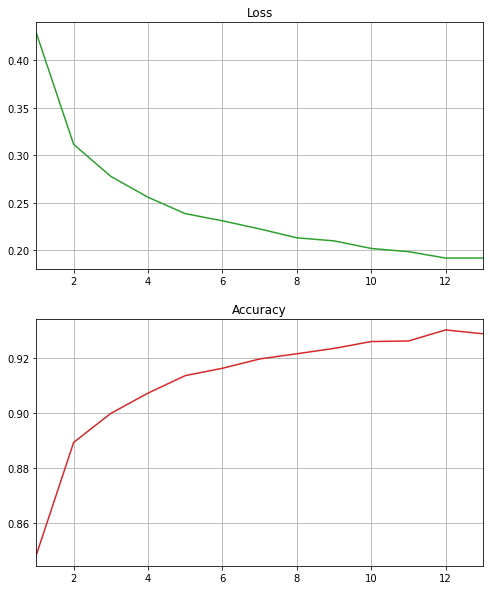

In [ ]:
fig = plt.figure(figsize=(8, 10))

ax = fig.add_subplot(2, 1, 1)
ax.set_title('Loss')
sns.lineplot(x=epochs, y=loss, color='tab:green')
plt.xlim([1, epochs[-1]])
plt.grid()

ax = fig.add_subplot(2, 1, 2)
ax.set_title('Accuracy')
sns.lineplot(x=epochs, y=accuracy, color='tab:red')
plt.xlim([1, epochs[-1]])
plt.grid()

plt.show()

In [ ]:
clf.evaluate(x_test, y_test)

313/313 [==============================] - 8s 24ms/step - loss: 0.2338 - accuracy: 0.9201


[0.23381681740283966, 0.9200999736785889]

In [ ]:
predicted = clf.predict(x_test).flatten().astype('uint8')

313/313 [==============================] - 8s 27ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted, target_names=labels))

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.91      0.87      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.90      0.86      0.88      1000
       Dress       0.90      0.93      0.92      1000
        Coat       0.84      0.92      0.88      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.82      0.70      0.76      1000
     Sneaker       0.96      0.97      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 28, 28)            0         
_________________________________________________________________
expand_last_dim (ExpandLastD (None, 28, 28, 1)         0         
_________________________________________________________________
normalization (Normalization (None, 28, 28, 1)         3         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0     

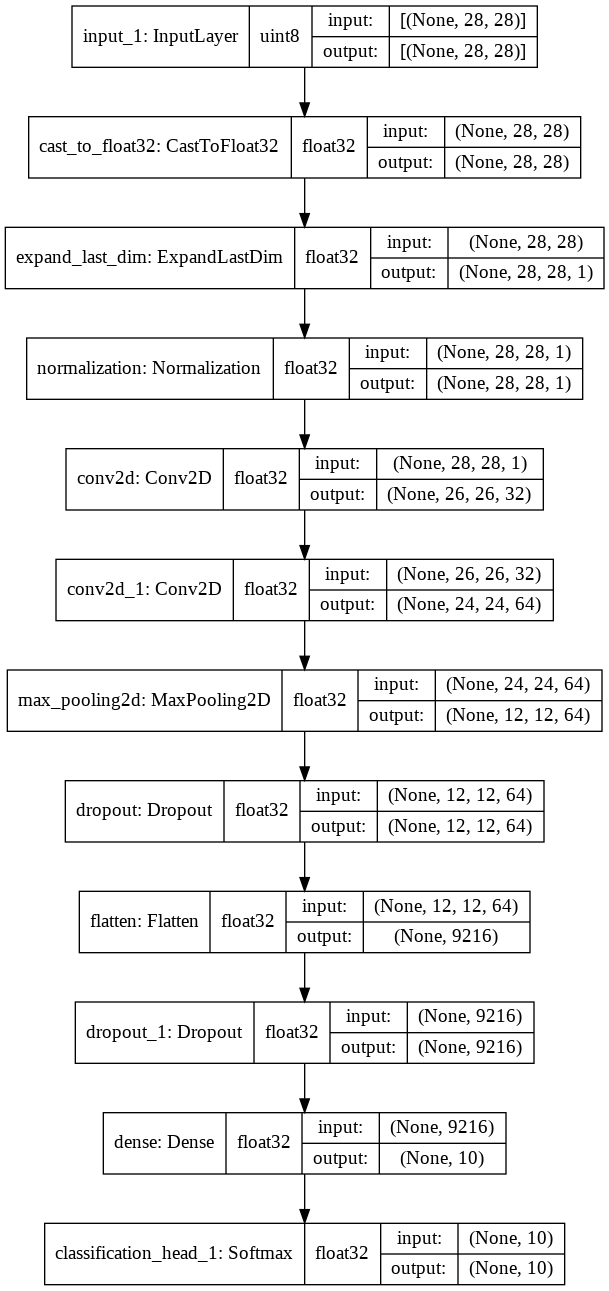

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_names=True, show_shapes=True, show_dtype=True)

In [ ]:
model.save('./fashion_mnist_best_model')

INFO:tensorflow:Assets written to: ./fashion_mnist_best_model/assets


In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('./fashion_mnist_best_model', custom_objects=ak.CUSTOM_OBJECTS)

In [ ]:
predicted_classes = loaded_model.predict(x_test).argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score, mean_absolute_error

print('Prediction accuracy:', accuracy_score(y_test, predicted_classes).round(3))
print('Prediction MAE:', mean_absolute_error(y_test, predicted_classes).round(3))

Prediction accuracy: 0.92
Prediction MAE: 0.265


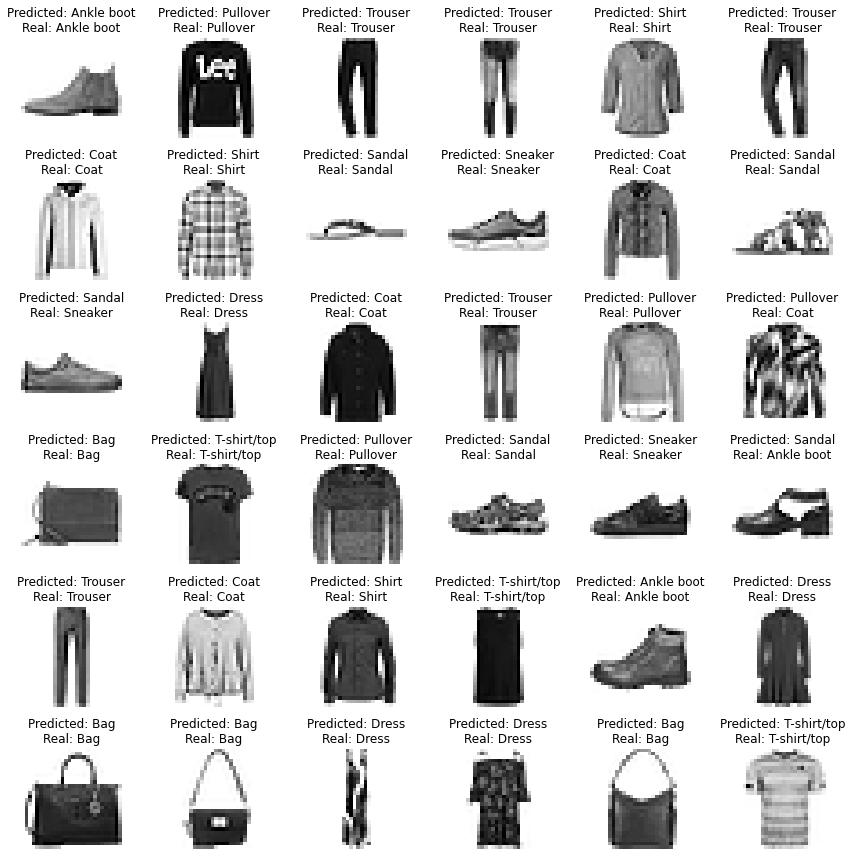

In [ ]:
fig = plt.figure(figsize=(12, 12))

for i in range(36):
    ax = fig.add_subplot(6, 6, i + 1)
    ax.set_axis_off()
    plt.imshow(x_test[i], cmap='binary')
    ax.set_title(f'Predicted: {labels[predicted_classes[i]]}\nReal: {labels[y_test[i]]}')

plt.tight_layout()
plt.show()

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs --host localhost